# Introduction 
You just accepted a job at CausalMarketing, a firm that offers marketing consulting services. 
For your first assignment, you've been tasked with helping a large online clothing store, Nosara, with their targeted advertising campaign.


Nosara is promoting a new handbag model priced at ***$100***, which is not yet available for sale. 

They randomly selected 3 million past customers and sent them emails offering the opportunity to pre-order the handbag. 

These customers were divided into two groups: 
***one received only the pre-order invitation (control group)***, and 
***the other received a 20% discount if they pre-ordered (treatment group)***. 
Each email allows the purchase of ***a single handbag***.

Nosara has ***10,979,592*** past customers who haven't been emailed yet. 
They want you to help them design a data-driven solution to 
decide which of these customers should ***receive a discount email*** and which should ***receive a regular email*** to ***maximize*** sales after discounts.

Nosara has shared two datasets:

one of customers who have already been emailed (nosara_labeled) and another of customers not yet emailed (nosara_unlabeled). The fields are:

Features (all numeric): f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11

treatment: Indicates group (1 = treated, 0 = control). 

preorder: Indicates if the customer pre-ordered (1=Yes, 0=No).

Note: Feature names were anonymized, and their values randomly projected to keep their predictive power without risking the privacy of Nosara’s customer base.

## Analysis

#### Business understanding 

Need to help the company to decide who need to receive the promotion emails to maximum the profits 
so the Benefit > cost 

#### Cost and Benefit martix 

|    | pre-order (1) | do not pre-order (0) |
| -------- | ------- | ------ |
| regular email   | BC = 100| 0 |
| 20% discount email| BC - DC = 80 | 0 |

Bag Cost(BC) : 100

Discount Cost(DC) : 20

#### Decision need to make 
10,979,592

#### what possbility we have 

|    | pre-order (1) | do not pre-order (0) |
| -------- | ------- | ------ |
| regular email (control)  | P(1\|RE) | P(0\|RE) |
| 20% discount email (treatment) | P(1\|DE) | P(0\|DE) |

P(1|RE) = from control group

P(0|RE) = from control group

P(1|DE) = from treatment group

P(0|DE) = from treatment group

#### Understand the business 

Nothing . just know it selling the bag witgh pre-order and want to get the maximum value

#### Understand the data 

2 datasets and group 

##### Group:

***one received only the pre-order invitation (control group)***  

***the other received a 20% discount if they pre-ordered (treatment group)***. 

##### Data: 

***receive a discount email***  (nosara_labeled)

***receive a regular email***   (nosara_unlabeled)

#### Modeling
Nth to do modeling is provided 



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

# Load Data
df_labeled = pd.read_csv("nosara_labeled.csv")
df_unlabeled = pd.read_csv("nosara_unlabeled.csv")

# Pre-process data
feature_names = ['f0','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11']
X = df_labeled[feature_names]
y = df_labeled.preorder
t = df_labeled.treatment
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_unlabeled = scaler.transform(df_unlabeled[feature_names])

# Split data
X_tr, X_te, y_tr, y_te, t_tr, t_te = train_test_split(X, y, t, test_size=0.2, random_state=1337)

# Data is large, so be patient with the training. 
# Model for treated
model_treat = LogisticRegression().fit(X_tr[t_tr==1],y_tr[t_tr==1])
# Model for control
model_control = LogisticRegression().fit(X_tr[t_tr==0],y_tr[t_tr==0])
print("Done!")

Done!


In [2]:
df_labeled.head(10)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,preorder
0,1,12.616365,10.059654,9.039539,4.679882,10.280525,4.115453,0.294443,4.833815,3.866188,13.190056,5.300375,-0.168679,1,0
1,2,13.087549,10.059654,8.214383,0.719526,10.280525,4.115453,-7.822229,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0
2,3,23.336990,10.059654,8.214383,4.679882,10.280525,4.115453,-4.595460,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0
3,4,22.709710,10.059654,8.214383,4.679882,10.280525,4.115453,-12.269776,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0
4,5,26.270187,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0
5,6,22.077220,10.059654,8.808085,4.679882,10.280525,4.115453,-3.282109,4.833815,3.872698,13.190056,5.300375,-0.168679,1,0
6,7,12.616365,10.059654,8.446365,4.679882,10.280525,4.115453,0.294443,4.833815,3.902645,20.050937,5.300375,-0.168679,0,0
7,8,13.046728,10.059654,8.825776,3.907662,10.280525,4.115453,-11.495164,4.833815,3.866188,13.190056,5.300375,-0.168679,1,0
8,9,22.615245,10.059654,8.214383,4.679882,10.280525,4.115453,-3.993764,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0
9,10,22.598413,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0


## calculate the prob. on 

|    | pre-order (1) | do not pre-order (0) |
| -------- | ------- | ------ |
| 20% discount email (treatment) | P(1\|DE) | P(0\|DE) |

## calculate the prob. on 

|    | pre-order (1) | do not pre-order (0) |
| -------- | ------- | ------ |
| regular email (control)  | P(1\|RE) | P(0\|RE) |

In [3]:
# Q1 use label the probability
E_1_DE = df_labeled[(df_labeled["treatment"] == 1) & (df_labeled["preorder"] == 1)].shape[0]
E_1_RE = df_labeled[(df_labeled["treatment"] == 0) & (df_labeled["preorder"] == 1)].shape[0]
P_1_DE = E_1_DE / df_labeled[(df_labeled["treatment"] == 1)].shape[0]
P_1_RE = E_1_RE/ df_labeled[(df_labeled["treatment"] == 0)].shape[0]

print(f"the # of Event on (1|DE) :{E_1_DE}")
print(f"the # of Event on (1|RE) :{E_1_RE}")
print(f"the # of Event {df_labeled.shape[0] }")
# Effect 
EVT = P_1_DE * 80  
EVNT = P_1_RE * 100 
effect = EVT - EVNT
print(f"Effect={effect}")
print(f"Since we just calculate what if sending the discount email to everyone")
print(f"Assume the probility is 1 ")
# Effect of Decision Rule 
effect_decision_rule = 10979592*1*effect
print(f"Effect Decision Rule={effect_decision_rule}")

the # of Event on (1|DE) :123643
the # of Event on (1|RE) :17072
the # of Event 3000000
Effect=0.0857854938867968
Since we just calculate what if sending the discount email to everyone
Assume the probility is 1 
Effect Decision Rule=941889.722395523


Suppose the predictive models provided by 卡洛斯 can properly estimate the probability of pre-ordering for each individual. What decision rule (expressed as an inequality) should we use to decide which email to send? If the inequality is met, we send the discount email; otherwise, we send the regular email. Use Pt to represent the probability of pre-order with the discount email and Pc to represent the probability of pre-order with the regular email.

pt*80-pc*100>0

Apply your decision rule from the previous question to the test set using the predictions from the models provided by 卡洛斯. What percentage of individuals is targeted by your rule? Enter your answer as a rounded integer. For example, if the percentage is 32.23%, enter 32 (not 0.3223).


Apply your decision rule from the previous question to the test set using the predictions from the models provided by 卡洛斯. What percentage of individuals is targeted by your rule? Enter your answer as a rounded integer. For example, if the percentage is 32.23%, enter 32 (not 0.3223).

In [4]:
# To calculate the individual probility
treat_predict_prob = model_treat.predict_proba(X_te)

control_predict_prob = model_control.predict_proba(X_te)


In [5]:
# calculate the action 
# Calculate the values for column 'value'
values = (treat_predict_prob[:, 1] * 80) - (control_predict_prob[:, 1] * 100)

# Calculate the actions for column 'action'
actions = [1 if value > 0 else 0 for value in values]

# Create a DataFrame
df_action = pd.DataFrame({'value': values, 'predict': actions,'real': y_te})

df_passing_threhold = df_action[df_action["predict"]==1]
df_fail_threhold = df_action[df_action["predict"]==0]

In [6]:
P_on_sending_email =  df_passing_threhold.shape[0] / X_te.shape[0]

print(f"the probility on sending discount email={P_on_sending_email}")

the probility on sending discount email=0.4190316666666667


What is the predicted average revenue effect after discounts for individuals targeted by your decision rule according to the models provided by 卡洛斯?

In [7]:


mean_action_apply_rule = df_action[(df_action["predict"]==1)]["value"].mean()
mean_do_not_apply_rule = df_action[(df_action["predict"]==0)]["value"].mean()
print(f"mean of apply rule : {mean_action_apply_rule}")
print(f"mean of do not apply rule : {mean_action_apply_rule}")

avg_effect_predict = mean_action_apply_rule  - mean_do_not_apply_rule 
print(f"avg_effect_predict: {avg_effect_predict}")

mean of apply rule : 0.4825970321179226
mean of do not apply rule : 0.4825970321179226
avg_effect_predict: 1.213552117540828


## calculate the prob. on 

|    | pre-order (1) | do not pre-order (0) |
| -------- | ------- | ------ |
| apply rule  | P(1\|AD) | P(0\|AD) |
| do not apply rule  | P(1\|DD) | P(0\|DD) |

Based on the treatment and preorder columns, what was the actual average revenue effect after discounts for those individuals targeted by your decision rule?

In [8]:
# all instance effect mean with effect > 0 
mean_action_apply_rule_positive = df_action[(df_action["predict"]==1) & (df_action["real"]==1) ]["value"].mean()
mean_action_apply_rule_negative = df_action[(df_action["predict"]==1) & (df_action["real"]==0) ]["value"].mean()
mean_do_not_apply_rule_positive = df_action[(df_action["predict"]==0) & (df_action["real"]==1) ]["value"].mean()
mean_do_not_apply_rule_negative = df_action[(df_action["predict"]==0) & (df_action["real"]==0) ]["value"].mean()

print(f"mean of apply rule with pre order: {mean_action_apply_rule_positive}")
print(f"mean of apply rule without pre order: {mean_action_apply_rule_negative}")
print(f"mean of do not apply rule with pre order: {mean_do_not_apply_rule_positive}")
print(f"mean of do not apply rule without pre order: {mean_do_not_apply_rule_negative}")


avg_effect_real_pre_order = mean_action_apply_rule_positive - mean_do_not_apply_rule_positive
print(f"avg_effect_real_pre_order: {avg_effect_real_pre_order}")

mean of apply rule with pre order: 3.0530032725988647
mean of apply rule without pre order: 0.38557314565383893
mean of do not apply rule with pre order: -6.083961042773779
mean of do not apply rule without pre order: -0.42635957764700205
avg_effect_real_pre_order: 9.136964315372644


Which of the two values you provided earlier is more reliable for assessing the model's performance in decision-making? Justify your answer.

For the remaining 10,979,592, give your best estimate of the total revenue after applying discounts if Nosara were to use your decision rule to determine which customers receive discount emails versus regular emails. Enter your answer as a rounded integer (e.g., if the revenue is $1,034.32, enter 1034).

In [9]:
print(f"Effect of Decision Rule: {10979592*P_on_sending_email*avg_effect_real_pre_order}")

Effect of Decision Rule: 42037315.59070893


Do you believe your current data-driven solution adds business value? Justify your answer.

Improve your current solution and apply it to the unlabeled data. Submit your results in a CSV file named decisions.csv. Generate this file using Dataiku or Python—do not open or edit it in Excel since it can't handle over a million rows, and this file will contain several millions of rows.

The file must have two columns. The first column, id, should contain the customer IDs from the "nosara_unlabeled" dataset, and the second column, decision, should include 1 for customers you choose to offer a discount to and 0 for those you do not. Refer to decisions_EXAMPLEHW2.csv Download decisions_EXAMPLEHW2.csv for the correct format.

Make sure your file is correctly formatted, avoiding common errors such as missing rows (often caused by using Excel instead of Dataiku or Python), missing columns, additional unnecessary columns, incorrect column headers (e.g., "Decision" instead of "decision"), submitting an Excel file instead of a CSV, submitting a file with a different number of accounts than required, and submitting decisions on the test set instead of the unlabeled data.

In [10]:
df_unlabeled["id"]

0            3000001
1            3000002
2            3000003
3            3000004
4            3000005
              ...   
10979587    13979588
10979588    13979589
10979589    13979590
10979590    13979591
10979591    13979592
Name: id, Length: 10979592, dtype: int64

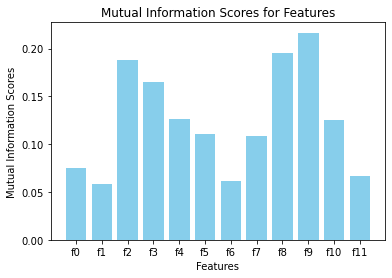

In [15]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
mutual_info_pre_order = mutual_info_classif(X, df_labeled.preorder)


# Plot a bar graph showing the mutual information scores for each feature
plt.bar(feature_names, mutual_info_pre_order, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title('Mutual Information Scores for Features')
plt.show()

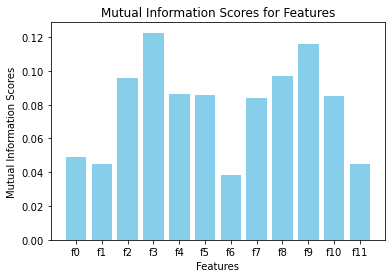

In [16]:
mutual_info_treatment = mutual_info_classif(X, df_labeled.treatment)


# Plot a bar graph showing the mutual information scores for each feature
plt.bar(feature_names, mutual_info_treatment, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title('Mutual Information Scores for Features')
plt.show()

In [18]:
# Pre-process data
feature_names = ['f2','f3','f4','f5','f7','f8','f9','f10']
X = df_labeled[feature_names]
y = df_labeled.preorder
t = df_labeled.treatment
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_unlabeled = scaler.transform(df_unlabeled[feature_names])

# Split data
X_tr, X_te, y_tr, y_te, t_tr, t_te = train_test_split(X, y, t, test_size=0.2, random_state=1337)

# Data is large, so be patient with the training. 
# Model for treated
model_treat = LogisticRegression().fit(X_tr[t_tr==1],y_tr[t_tr==1])
# Model for control
model_control = LogisticRegression().fit(X_tr[t_tr==0],y_tr[t_tr==0])
print("Done!")

Done!


In [19]:
# To calculate the individual probility
treat_predict_unlabel_prob = model_treat.predict_proba(X_unlabeled)

control_predict_unlabel_prob = model_control.predict_proba(X_unlabeled)

values_unlabel = (treat_predict_unlabel_prob[:, 1] * 80) - (control_predict_unlabel_prob[:, 1] * 100)
actions_unlabel = [1 if value > 0 else 0 for value in values_unlabel]
df_action_unlabel = pd.DataFrame({'id': df_unlabeled["id"], 'decision': actions_unlabel})
actions = [1 if value > 0 else 0 for value in values]

df_action_unlabel.to_csv('decision.csv', index=False)

In [20]:
# To calculate the individual probility
treat_predict_prob = model_treat.predict_proba(X_te)

control_predict_prob = model_control.predict_proba(X_te)


# calculate the action 
# Calculate the values for column 'value'
values = (treat_predict_prob[:, 1] * 80) - (control_predict_prob[:, 1] * 100)

# Calculate the actions for column 'action'
actions = [1 if value > 0 else 0 for value in values]

# Create a DataFrame
df_action = pd.DataFrame({'value': values, 'predict': actions,'real': y_te})


# all instance effect mean with effect > 0 
mean_action_apply_rule_positive = df_action[(df_action["predict"]==1) & (df_action["real"]==1) ]["value"].mean()
mean_action_apply_rule_negative = df_action[(df_action["predict"]==1) & (df_action["real"]==0) ]["value"].mean()
mean_do_not_apply_rule_positive = df_action[(df_action["predict"]==0) & (df_action["real"]==1) ]["value"].mean()
mean_do_not_apply_rule_negative = df_action[(df_action["predict"]==0) & (df_action["real"]==0) ]["value"].mean()

print(f"mean of apply rule with pre order: {mean_action_apply_rule_positive}")
print(f"mean of apply rule without pre order: {mean_action_apply_rule_negative}")
print(f"mean of do not apply rule with pre order: {mean_do_not_apply_rule_positive}")
print(f"mean of do not apply rule without pre order: {mean_do_not_apply_rule_negative}")


avg_effect_real_pre_order = mean_action_apply_rule_positive - mean_do_not_apply_rule_positive
print(f"avg_effect_real_pre_order: {avg_effect_real_pre_order}")

mean of apply rule with pre order: 3.209495793277509
mean of apply rule without pre order: 0.3977946646252741
mean of do not apply rule with pre order: -5.946812635000851
mean of do not apply rule without pre order: -0.38362284368093597
avg_effect_real_pre_order: 9.156308428278361


In [21]:
mean_action_apply_rule = df_action[(df_action["predict"]==1)]["value"].mean()
mean_do_not_apply_rule = df_action[(df_action["predict"]==0)]["value"].mean()
print(f"mean of apply rule : {mean_action_apply_rule}")
print(f"mean of do not apply rule : {mean_action_apply_rule}")

avg_effect_predict = mean_action_apply_rule  - mean_do_not_apply_rule 
print(f"avg_effect_predict: {avg_effect_predict}")

mean of apply rule : 0.5036787163267552
mean of do not apply rule : 0.5036787163267552
avg_effect_predict: 1.1779968646374421
